# The Seven League Scheme: Deep learning for large time step Monte Carlo simulations of stochastic differential equations

## <b>Problem</b>
7L Scheme
The 7L scheme solved the SDE using large time steps. In other numerical scheme such as Euler/Milstien a large amount of discretization is required to achieve high order convergence. Due the large discretization it leads to discrezation bias. However the 7L scheme uses large time step there the discreziation bias is reduced.

The scheme uses Artifical Neural networks (ANN) to learn SC points, then MC is performed by using large time steps.



My Solution




In [25]:
import matplotlib.pyplot as plt
from Lagrange import LagrangePoly
import numpy as np
from scipy.stats import norm
from BSCallAnalytical import BSCallAnalytical

Analytical pricing of European Call Option, to be used as benchmark

In [26]:
callOption = BSCallAnalytical(100, 50, 1, 0.5, 0.2)
callOption.price()

69.67346701649471

Price the European Call Option using SCMC - collocation method

Formulae to generate collocation points

 $\hat {y}(\tau_{i}) = F^{-1}_{Y(\tau_{i})}(F_{X}(x_{j}))$
 
 Attempt below to generate once MC path using the collocation technique, after getting the below correct will expand to multiple path and conditional collocation points


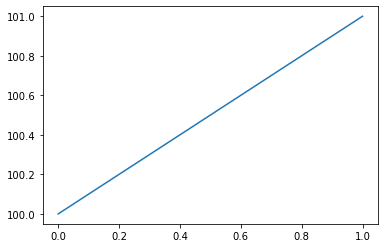

In [45]:
S0=100
K=50
mean=0.5
variance=0.2
sampleSize=1000

#generate normal(0,1) quadrature point
x = np.polynomial.hermite_e.hermegauss(5)[0]

#convert to disribution normal disribution with mean and variance defined , unsure?
y= norm.ppf(norm.cdf(x),loc=mean,scale=variance)

#determine the interpolation function
lp = LagrangePoly(x, y)

# Generate random sample using normal distributed values, unsure about below?
samplex = np.linspace(-2.5, 2.5, sampleSize)
# interpolate the 1000 values
sampley = S0 + lp.interpolate(samplex)
#generate random samples
w = np.random.standard_normal(sampleSize)

samplePath = S0 +  lp.interpolate(w)
plt.plot(np.linspace(0,1,sampleSize), sampley,'-' )
plt.show()
